pandas is a column-oriented data analysis API. 

### How to get rid of NaN values

In [5]:
import pandas as pd
pd.__version__

'0.23.0'

The primary data structures in pandas are implemented as two classes:

DataFrame, which you can imagine as a relational data table, with rows and named columns.
Series, which is a single column. A DataFrame contains one or more Series and a name for each Series.
The data frame is a commonly used abstraction for data manipulation. Similar implementations exist in Spark and R.

One way to create a Series is to construct a Series object. For example:

In [8]:
pd.Series(['san Francisco', 'san jose', 'san diego'])

0    san Francisco
1         san jose
2        san diego
dtype: object

DataFrame objects can be created by passing a dict mapping string col names to their respective series

In [7]:
city_names = pd.Series(['san franscisco', 'san jose', 'san diego'])
population = pd.Series([852469, 1015785, 485199])
pd.DataFrame({'City Name' : city_names, 'Population' : population})

,City Name,Population
0,san franscisco,852469
1,san jose,1015785
2,san diego,485199


But most of the time, you load an entire file into a DataFrame. The following example loads a file with California housing data. 

In [9]:
cal_housing_data = pd.read_csv("https://storage.googleapis.com/mledu-datasets/california_housing_train.csv", sep=',')
cal_housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


The example above used DataFrame.describe to show interesting statistics about a DataFrame. Another useful function is DataFrame.head, which displays the first few records of a DataFrame:

In [10]:
cal_housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


Another powerful feature of pandas is graphing. For example, DataFrame.hist lets you quickly study the distribution of values in a column:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10c5f2fd0>]],
      dtype=object)

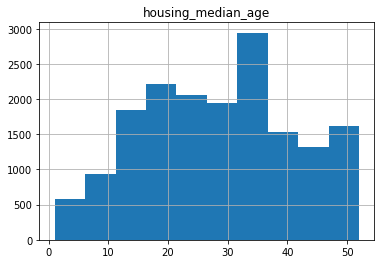

In [13]:
cal_housing_data.hist('housing_median_age')

Accessing Data
You can access DataFrame data using familiar Python dict/list operations:

In [12]:
city_names = pd.Series(['san franscisco', 'san jose', 'san diego'])
population = pd.Series([852469, 1015785, 485199])
cities = pd.DataFrame({'City Name' : city_names, 'Population' : population})
cities['City Name']


0    san franscisco
1          san jose
2         san diego
Name: City Name, dtype: object

In [8]:
cities['City Name'][1]

'san jose'

In [21]:
cities[0:1]

,City Name,Population
0,san franscisco,852469


You may apply Python's basic arithmetic operations to Series. For example:

In [22]:
population/1000

0     852.469
1    1015.785
2     485.199
dtype: float64

NumPy is a popular toolkit for scientific computing. pandas Series can be used as arguments to most NumPy functions:

In [24]:
import numpy as np
np.log(population)

0    13.655892
1    13.831172
2    13.092314
dtype: float64

Modifying DataFrames is also straightforward. For example, the following code adds two Series to an existing DataFrame:

In [27]:
cities['Area square miles'] = pd.Series([46.87, 176.53, 97.92])
cities['population density'] = cities['Population'] / cities['Area square miles']
cities

,City Name,Population,Area square miles,population density
0,san franscisco,852469,46.87,18187.945381
1,san jose,1015785,176.53,5754.177760
2,san diego,485199,97.92,4955.055147


For more complex single-column transformations, you can use Series.apply. Like the Python map function, Series.apply accepts as an argument a lambda function, which is applied to each value.

The example below creates a new Series that indicates whether population is over one million:

In [ ]:
population.apply(lambda val: val > 1000000)

### Exercise #1
#### Modify the cities table by adding a new boolean column that is True if and only if both of the following are True:

1. The city is named after a san.
2. The city has an area greater than 50 square miles.

In [32]:
cities['wide and starts with'] = (cities['Area square miles'] > 50) & cities['City Name'].apply(lambda name: name.startswith('san'))

In [33]:
cities

,City Name,Population,Area square miles,population density,wide and starts with
0,san franscisco,852469,46.87,18187.945381,False
1,san jose,1015785,176.53,5754.177760,True
2,san diego,485199,97.92,4955.055147,True


Indexes
Both Series and DataFrame objects also define an index property that assigns an identifier value to each Series item or DataFrame row.

By default, at construction, pandas assigns index values that reflect the ordering of the source data. Once created, the index values are stable; that is, they do not change when data is reordered.

In [34]:
cities.index

RangeIndex(start=0, stop=3, step=1)

Call DataFrame.reindex to manually reorder the rows. For example, the following has the same effect as sorting by city name:

In [39]:
cities.reindex([2, 0, 1])
cities

,City Name,Population,Area square miles,population density,wide and starts with
0,san franscisco,852469,46.87,18187.945381,False
1,san jose,1015785,176.53,5754.177760,True
2,san diego,485199,97.92,4955.055147,True


Reindexing is a great way to shuffle (randomize) a DataFrame. In the example below, we take the index, which is array-like, and pass it to NumPy's random.permutation function, which shuffles its values in place. Calling reindex with this shuffled array causes the DataFrame rows to be shuffled in the same way. Try running the following cell multiple times!

In [41]:
cities.reindex(np.random.permutation(cities.index))

,City Name,Population,Area square miles,population density,wide and starts with
0,san franscisco,852469,46.87,18187.945381,False
2,san diego,485199,97.92,4955.055147,True
1,san jose,1015785,176.53,5754.177760,True


In [42]:
cities.reindex(np.random.permutation(cities.index))

,City Name,Population,Area square miles,population density,wide and starts with
1,san jose,1015785,176.53,5754.177760,True
0,san franscisco,852469,46.87,18187.945381,False
2,san diego,485199,97.92,4955.055147,True


You can read csv file and display the 

In [14]:
df = pd.read_csv('../etl_snapshot_tests.csv')  # TEST RESULTS
with pd.option_context('display.max_rows', None):
    display(df)

,Size on S3,Number of Records,File Structure,DPUs,Duration (in minutes)
0,12.9mb,42084,1x 12.9mb,2,1
1,12.9mb,42084,1x 12.9mb,2,1
2,12.9mb,42084,1x 12.9mb,2,1
3,12.9mb,42084,1x 12.9mb,2,1
4,12.9mb,42084,1x 12.9mb,2,1
5,12.9mb,42084,1x 12.9mb,10,1
6,12.9mb,42084,1x 12.9mb,10,1
7,12.9mb,42084,1x 12.9mb,10,1
8,12.9mb,42084,1x 12.9mb,10,1
9,12.9mb,42084,1x 12.9mb,10,1


In [ ]:
# PD Data Frame

res_df = pd.DataFrame({'Features': feat, 'Importance': feat_imp}).sort_values(by='Importance', ascending=False)

res_df.plot('Features', 'Importance', kind='bar', title='Feature Importance')